### 课程内容
- python数据科学技能树
    - 知识体系
    - 团队构建
    - 部重室和WISER Club提供的支持
- python编程进阶实战

## 一、python数据科学技能树
### 1.  知识体系
在python的生态系统中可以发现，已经出现如java语言那样坚实稳定的基础
![](images/python-ecosystem.png?20170628)

### 2. 团队构建
数据科学是一门综合型和实验性都很强的学科，在项目实践中，一个人单打独斗的日子已经一去不复返了，知识互补的团队作战才能适应未来。

![](images/data-science.png?20170628)

团队的成员知识互补达到均衡

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<Container object of 7 artists>

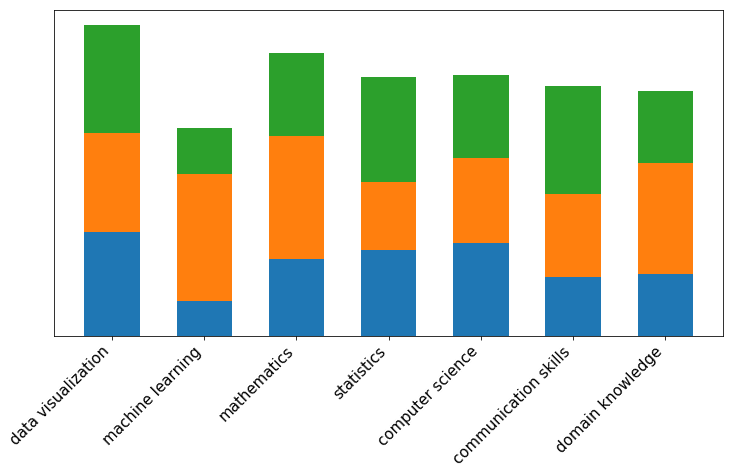

In [2]:
n = 7
np.random.seed(123)
y = np.random.randint(20, 80, size=n)
fig, axs = plt.subplots(1, figsize=(12,6))
labels = ['data visualization', 'machine learning', 'mathematics', 'statistics', 
          'computer science', 'communication skills', 'domain knowledge']
x = range(n)
plt.bar(x, y, width=0.6, tick_label = labels);
for label in axs.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_fontsize(15)
    label.set_horizontalalignment("right")
    
axs.get_yaxis().set_visible(False)

z = np.random.randint(20, 80, size=n)
plt.bar(x, z, bottom=y, width=0.6)

w = np.random.randint(20, 80, size=n)
plt.bar(x, w, bottom=y + z, width=0.6)

### 3. 部重室和WISER Club提供的支持
- 横向课题
- 学生培养
- 人才推荐

#### 数据共享和计算平台
- 学生社区
- 课题协作
- 可视化平台
- 数据API
- 在线开发平台
- 并行计算平台（建设中）

#### 数据API演示

In [3]:
import requests
import json
resp = requests.get('http://api.wisesoe.com/getgtatree?codes=GTA_SZL2')
print('Status:', resp.status_code, resp.reason)
json.loads(resp.text)

Status: 200 OK


{'data': [{'_id': 'GTA_SZL2_BULLETIN',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '公告及增值信息'},
  {'_id': 'GTA_SZL2_ORDER',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '逐笔委托'},
  {'_id': 'GTA_SZL2_ORDERQUEUE',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '委托队列'},
  {'_id': 'GTA_SZL2_STOCKINFO',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '证券静态信息'},
  {'_id': 'GTA_SZL2_STOCKSTATUS',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '证券状态'},
  {'_id': 'GTA_SZL2_TAQ',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '十档行情'},
  {'_id': 'GTA_SZL2_TRADE',
   'enddate': 0,
   'indicator_type_id': None,
   'ispcode': '1',
   'startdate': 0,
   'title': '逐笔成交'}],
 'msg': 'success'}

In [4]:
resp = requests.get('http://api.wisesoe.com/getgtaindicator?codes=GTA_SZL2_TAQ')
json.loads(resp.text)['data'][:5]

[{'_id': 'SECURITYID',
  'description': '',
  'is_nullable': 'NO',
  'position': 1,
  'title': '证券代码'},
 {'_id': 'TRDDATE',
  'description': '以YYYYMMDD表示',
  'is_nullable': 'NO',
  'position': 2,
  'title': '日期'},
 {'_id': 'DATATIMESTAMP',
  'description': '',
  'is_nullable': 'YES',
  'position': 3,
  'title': '数据生成时间'},
 {'_id': 'PRECLOSEPX',
  'description': '3位小数',
  'is_nullable': 'YES',
  'position': 4,
  'title': '昨日收盘价'},
 {'_id': 'OPENPX',
  'description': '3位小数',
  'is_nullable': 'YES',
  'position': 5,
  'title': '开盘价'}]

In [5]:
import pandas
resp = requests.get('http://api.wisesoe.com/getgtamap?period=201701,201702&'\
                    'codes=SHL2_TAQ_600153__SECURITYID,SHL2_TAQ_600153__TRDDATE,SHL2_TAQ_600153__DATATIMESTAMP,SHL2_TAQ_600153__LASTPX')
result = json.loads(resp.text)['data']

In [6]:
data = {item['code']: item['value'] for item in result}
columns = [item['code'] for item in result]
pandas.DataFrame(data, columns=columns).head()

,SHL2_TAQ_600153__SECURITYID,SHL2_TAQ_600153__TRDDATE,SHL2_TAQ_600153__DATATIMESTAMP,SHL2_TAQ_600153__LASTPX
0,600153,20170103,092506,10.71
1,600153,20170103,092904,10.71
2,600153,20170103,093002,10.72
3,600153,20170103,093006,10.71
4,600153,20170103,093009,10.72


## 二、python编程进阶实战
python提供了非常多高效的编程语法，我们看看下面几个

### 1、迭代器和生成器
#### 迭代器
- 迭代器就是实现了\_\_next\_\_方法的对象，\_\_next\_\_方法返回下一个值
- 可迭代对象是实现\_\_iter\_\_的对象，\_\_iter\_\_方法会返回一个迭代器，list,tuple,dict和set都是可迭代对象
- 可迭代对象和迭代器可以是同一个对象，也可以不是

![](images/iter.png?20170710)

In [66]:
class Fib:
    
    def __init__(self, max):
        self.a = 0
        self.b = 1
        self.max = max

    def __iter__(self):
        return self

    def __next__(self): #python 2使用next(self)        
        t = self.a
        if t > self.max:
            raise StopIteration        
        self.a, self.b = self.b, self.a + self.b
        return t

- fib是Fib类的对象，Fib类实现了\_\_iter\_\_，也实现了\_\_next\_\_，因而fib既是一个可迭代对象，也是一个迭代器
- iter()传入一个可迭代对象，则调用可迭代对象中的\_\_iter\_\_方法，\_\_iter\_\_方法返回一个迭代器
- next()传入一个迭代器，则调用迭代器的\_\_next\_\_方法，返回下一个值
- next()抛出StopIteration Exception，表示迭代已经穷尽

In [68]:
from collections import Iterable, Iterator
fib = Fib(100)
fib_iterator = iter(fib)
print(isinstance(fib, Iterable), isinstance(fib, Iterator))
print(next(fib_iterator), next(fib_iterator), next(fib_iterator), next(fib_iterator), next(fib_iterator))

True True
0 1 1 2 3


In [69]:
while True:
    try:
        print(next(fib_iterator), end=' ')
    except StopIteration: 
        break

5 8 13 21 34 55 89 

In [70]:
for i in fib:    
    print(i, end=' ')

可迭代对象同时将自己作为迭代器，在状态上可能会出现问题。迭代器只会向前迭代，这时内部变量a和b已经被赋新值，如上将继续迭代，而不是重新开始。要得到预期结果，需要重新初始化状态。

In [72]:
class Fib2:
    
    def __init__(self, max):       
        self.max = max

    def __iter__(self):
        self.a = 0
        self.b = 1
        return self

    def __next__(self): #python 2使用next(self)
        t = self.a
        if t > self.max:
            raise StopIteration
        self.a, self.b = self.b, self.a + self.b
        return t

In [73]:
fib2 = Fib2(100)
for i in fib2:    
    print(i, end=' ')

for i in fib2:    
    print(i, end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 0 1 1 2 3 5 8 13 21 34 55 89 

或者编写一个迭代器类，可迭代对象每次都返回一个迭代器类的新实例。

In [13]:
class Fib3:    

    def __init__(self, max):
        self.max = max

    def __iter__(self):
        return Fib3_Iterator(self.max)
    
class Fib3_Iterator:

    def __init__(self, max):
        self.a = 0
        self.b = 1
        self.max = max
    
    def __iter__(self): #原则上非必须，但要成为Iterator对象必须
        return self
    
    def __next__(self):
        t = self.a
        if t > self.max:
            raise StopIteration
        self.a, self.b = self.b, self.a + self.b
        return t

In [14]:
fib3 = Fib3(100)
fib3_iterator = iter(fib3)
print(isinstance(fib, Iterable), isinstance(fib, Iterator))
print(next(fib3_iterator), next(fib3_iterator), next(fib3_iterator), next(fib3_iterator), next(fib3_iterator))

True True
0 1 1 2 3


In [15]:
for i in fib3:    
    print(i, end=' ')
for i in fib3:    
    print(i, end=' ')

0 1 1 2 3 5 8 13 21 34 55 89 0 1 1 2 3 5 8 13 21 34 55 89 

无论可迭代对象和迭代器是否是同一个对象，在使用时都要注意迭代器状态的变化。请对比如下两个例子：

In [16]:
fib3 = Fib3(100)
fib3_iterator = iter(fib3)
fib3_iterator_list = [fib3_iterator] * 2
fib3_iterator_list

In [17]:
list(zip(fib3_iterator,fib3_iterator))

[(0, 1), (1, 2), (3, 5), (8, 13), (21, 34), (55, 89)]

In [18]:
list(zip(iter(fib3),iter(fib3)))

[(0, 0),
 (1, 1),
 (1, 1),
 (2, 2),
 (3, 3),
 (5, 5),
 (8, 8),
 (13, 13),
 (21, 21),
 (34, 34),
 (55, 55),
 (89, 89)]

其他方法的应用

In [19]:
list(enumerate(fib3))

[(0, 0),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 5),
 (6, 8),
 (7, 13),
 (8, 21),
 (9, 34),
 (10, 55),
 (11, 89)]

python内置列表对象迭代器

In [20]:
li = []
print(isinstance(li, Iterable), isinstance(li, Iterator))
li_iterator = iter(li)
print(isinstance(li_iterator, Iterable), isinstance(li_iterator, Iterator))

True False
True True


In [21]:
di = {}
iter(di)

In [22]:
help(li)
help(li_iterator)

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /

#### 生成器
生成器也是迭代器
![](images/gen.png?20170710)

In [23]:
from collections import Iterable, Iterator
[x * x for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

列表推导式直接改造成生成器

In [24]:
gen = (x * x for x in range(10))
print(isinstance(gen, Iterable), isinstance(gen, Iterator))
gen

True True


<generator object <genexpr> at 0x000001D4CB44D678>

In [25]:
print(next(gen),next(gen),next(gen),next(gen))

0 1 4 9


In [26]:
def gen_number(): # 生成器函数
    yield 1
    yield 2
    yield 3


gen2 = gen_number()
print(isinstance(gen2, Iterable), isinstance(gen2, Iterator))
gen2

True True


<generator object gen_number at 0x000001D4CB44DA98>

In [27]:
print(next(gen2), next(gen2), next(gen2)) #next()方法调用生成器函数，遇到yield返回其值，并挂起，等待下一次调用

1 2 3


In [28]:
def get_fib(max):
    a = 0
    yield a 
    b = 1
    while True: 
        a, b = b, a + b
        if a > max:
            break
        yield a

In [29]:
gen3 = get_fib(100) #生成器生成的值，可以看成是yield返回值的序列，类比迭代器调用next()的返回值
gen3

<generator object get_fib at 0x000001D4CB44D620>

In [30]:
list(gen3)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

生成器函数中不用return的原因是，生成器函数的返回值是一个生成器，而生成器生成的值才是yield的返回值。下面对比与return的不同，return表示离开函数体，但是yeild没有，只是挂起。

In [31]:
def gen_number2(): 
    try:
        yield 1
        yield 2
        yield 3
    finally:
        yield 0

In [32]:
list(gen_number2())

[1, 2, 3, 0]

### 2、面向切面编程：装饰器
面向切面编程（Aspect Oriented Program，AOP）是面向对象编程的有力补充。面向对象将不同的功能封装到不同的类的方法中，降低代码的复杂度，做到职责分离。但是职责分离，有可能带来重复的功能代码（比如，类中每个方法可能都要有写日志或权限判断的功能代码），否则就要很有预见的封装到父类中。
面向切面编程允许在运行时，动态切入到类的方法，在方法之前或之后执行一些功能代码。装饰器的使用场景包括，日志，缓存，事务，验证，授权等

![](images/gun.jpg)
![](images/gun2.jpg)


下面是一个正常函数及其调用

In [77]:
def do(something = 'nothing'):
    print('Do', something)

do('my job')

Do my job


函数可以赋值

In [78]:
enjoy = do
enjoy()

Do nothing


函数可以作为返回值

In [35]:
def do(something = 'nothing'):
    def finish(something = something):
        print('Finish', something)
    return finish

do()()

Finish nothing


函数可以作为参数

In [36]:
def finish(something = 'nothing'):
    print('Finish', something)

def finish_wrapper(func):
    print('Before finish')
    func()
    print('After finish')

finish_wrapper(finish)

Before finish
Finish nothing
After finish


组合以上特性，构建一个装饰器

In [37]:
def finish(something = 'nothing'):
    print('Finish', something)    

def finish_wrapper_wrapper(func): #decorator
    def finish_wrapper():
        print('Before finish')
        func()
        print('After finish')    
    return finish_wrapper

finish()
finish = finish_wrapper_wrapper(finish)
finish()

Finish nothing
Before finish
Finish nothing
After finish


In [38]:
@finish_wrapper_wrapper
def finish(something = 'nothing'):
    print('Finish', something) 

finish()
print(finish.__name__)

Before finish
Finish nothing
After finish
finish_wrapper


本质上此finish已经不是彼finish函数了。解决方案是使用@wraps装饰器，复制finish的函数名称、注释文档、参数列表

In [39]:
from functools import wraps

def finish_wrapper_wrapper(func): #decorator
    @wraps(func)
    def finish_wrapper():
        print('Before finish')
        func()
        print('After finish')
    return finish_wrapper

@finish_wrapper_wrapper
def finish(something = 'nothing'):
    print('Finish', something)

finish()
print(finish.__name__)

Before finish
Finish nothing
After finish
finish


被装饰函数finish函数带参数和返回值的处理

In [40]:
from functools import wraps

def finish_wrapper_wrapper(func):  #decorator
    @wraps(func)
    def finish_wrapper(something = 'nothing'):
        print('Before finish')
        result = func(something = something)
        print('After finish')
        return result
    return finish_wrapper

@finish_wrapper_wrapper
def finish(something = 'nothing'):
    print('Finish', something)
    return 'Done'

print(finish(something = 'my job'))

Before finish
Finish my job
After finish
Done


被装饰函数finish有不定数量的参数的处理

In [41]:
from functools import wraps

def finish_wrapper_wrapper(func): #decorator
    @wraps(func)
    def finish_wrapper(*args, **kwargs):
        print('Before finish')
        result = func(*args, **kwargs)
        print('After finish')
        return result
    return finish_wrapper

@finish_wrapper_wrapper
def finish(something = 'nothing'):
    print('Finish', something)
    return 'Done'

@finish_wrapper_wrapper
def finish2(who, something = 'nothing'):
    print(who, 'finish', something)
    return 'Done'

print(finish(something = "the job"))
print('-' * 20)
print(finish2('You',something = "the job"))

Before finish
Finish the job
After finish
Done
--------------------
Before finish
You finish the job
After finish
Done


装饰器finish_wrapper_wrapper带参数的处理

In [42]:
from functools import wraps

def  finish_wrapper_wrapper_wrapper(name):
    def finish_wrapper_wrapper(func): #decorator
        @wraps(func)
        def finish_wrapper(*args, **kwargs):
            print('Before', name)
            result = func(*args, **kwargs)
            print('After', name)
            return result
        return finish_wrapper
    return finish_wrapper_wrapper

In [43]:
@finish_wrapper_wrapper_wrapper('finish')
def finish(something = 'nothing'):
    print('Finish', something)
    return 'Done'

@finish_wrapper_wrapper_wrapper('finish2')
def finish2(who, something = 'nothing'):
    print(who, 'finish', something)
    return 'Done'

print(finish(something = "the job"))
print('-' * 20)
print(finish2('You',something = "the job"))

Before finish
Finish the job
After finish
Done
--------------------
Before finish2
You finish the job
After finish2
Done


封装成为类装饰器，使用魔法方法\_\_call\_\_

In [44]:
from functools import wraps

class FinishDecorator(object):
    
    def __init__(self, name):
        self.name = name
    
    def __call__(self, func): #decorator
        @wraps(func)
        def finish_wrapper(*args, **kwargs):
            print('Before', self.name)
            result = func(*args, **kwargs)
            print('After', self.name)
            return result
        return finish_wrapper

In [45]:
@FinishDecorator('finish')
def finish(something = 'nothing'):
    print('Finish', something)
    return 'Done'

@FinishDecorator('finish_2')
def finish2(who, something = 'nothing'):
    print(who, 'finish', something)
    return 'Done'

print(finish(something = "the job"))
print('-' * 20)
print(finish2('You',something = "the job"))

Before finish
Finish the job
After finish
Done
--------------------
Before finish_2
You finish the job
After finish_2
Done


In [46]:
@FinishDecorator('finish_1')
@FinishDecorator('finish_2')
def finish3(who, something = 'nothing'):
    print(who, 'finish', something)
    return 'Done'

print(finish3('You',something = "the job"))

Before finish_1
Before finish_2
You finish the job
After finish_2
After finish_1
Done


### 3、面向对象编程
面向对象编程（Object Oriented Programming，OOP），是一种程序设计思想。类是面向对象编程的基础，类是一种数据结构，类是现实世界的抽象。对象和实例是类的具体化。可以类比一下，类是蓝图或者模型，用来产生真实的物体(实例)。因此使用关键字class就有类别，种属这样的意义。类是面向对象编程的基础，通过类结构定义实现面向对象的特性：封装、继承和多态。
![](images/oop.png?20170710)

In [47]:
class Plant(object):
    def __init__(self, name):
        self.name = name
        print(self.name, "is here")

    def make_oxygen(self):
        print(self.name,'makes oxygen')


class Animal(object):
    def __init__(self, name):
        self.name = name
        print(self.name, 'is here')

    def say(self, something):
        print(self.name , 'says', something)


class Dog(Animal): # 继承
    def __init__(self, name):
        self.name = name     
        super(Dog, self).__init__(name)

    def run(self, somewhere):
        print(self.name, 'runs to', somewhere)


class PlantFish(Plant, Animal):   # 多重继承 
    def __init__(self, name):
        self.name = name
        super(PlantFish, self).__init__(name)
    
    def think(self, something):
        print(self.name, 'thinks', something)

In [48]:
dog = Dog("Lucky")
dog.say('hello')
dog.run('park')
print(isinstance(dog, Dog), isinstance(dog, Animal))

Lucky is here
Lucky says hello
Lucky runs to park
True True


In [49]:
plant_fish = PlantFish("Super")
plant_fish.say('hi')
plant_fish.make_oxygen()
plant_fish.think('nothing')
print(isinstance(plant_fish, PlantFish) ,isinstance(plant_fish, Animal) ,isinstance(plant_fish, Plant))

Super is here
Super says hi
Super makes oxygen
Super thinks nothing
True True True


面向对象的多态，实现的编程思想中的对扩展开发，对修改封闭的基本原则，新增一种Animal子类不需要修改make_sound方法

In [50]:
def make_sound(obj): 
    obj.say('hello')

make_sound(dog)
make_sound(plant_fish)

Lucky says hello
Super says hello


python的甚至不需要严格的类继承体系，也能实现多态的效果。这称作“鸭子类型”，一个对象只要“看起来像鸭子，走起路来像鸭子”，那它就可以被看做是鸭子。

In [51]:
class Person(object):
    def __init__(self, name):
        self.name = name
        print(self.name, 'is here')
        
    def say(self, something):
        print(self.name , 'says', something)
        
person = Person('Mike')
make_sound(person)

Mike is here
Mike says hello


#### 重构实现类的封装：通过百度下载视频

In [ ]:
import requests
import re
from pyquery import PyQuery as pq

key = '如何掌控你的自由时间'
baiduUrl = 'https://www.baidu.com/s?wd=%s site:open.163.com'
flvUrl = 'http://www.flvcd.com/parse.php?format=&kw=%s'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) '\
        'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}
resp = requests.get(baiduUrl % key, headers=headers)
page = pq(resp.text)
items = [(item('a').attr('href'), item('div.c-span-last').text()) for item in  page('div.c-container div.c-gap-top-small').items()]
videoPageUrl = ''
if(len(items) > 0):
    firstResp = requests.get(items[0][0], allow_redirects=False, headers=headers)
    if(firstResp.status_code == 302):
        videoPageUrl = firstResp.headers.get('location')
    elif(firstResp.status_code == 200):
        matchGroup = re.search(r'URL=\'(.*?)\'', firstResp.text, re.S)
        videoPageUrl = matchGroup.group(1)
        print(videoPageUrl)
    if videoPageUrl:
        flvResp = requests.get(flvUrl % videoPageUrl, headers=headers)
        flvPage = pq(flvResp.text)
        flvItems = [item.attr('href') for item in flvPage('td.mn a.link').items()]
        if(len(flvItems) > 0 and flvItems[0]):
            videoUrl = flvItems[0]
            print(videoUrl)
            if videoUrl:
                downResp = requests.get(videoUrl, stream=True)
                fileName = 'video/%s.flv' % key
                with open(fileName, "wb") as file:
                    file.write(downResp.content)
                    print('finish')

In [ ]:
import requests
import re
from pyquery import PyQuery as pq

class OnlineVideoCrawler(object):
    def __init__(self, keys):
        self.keys = keys
        self.baiduUrl = 'https://www.baidu.com/s?wd=%s site:open.163.com'
        self.flvUrl = 'http://www.flvcd.com/parse.php?format=&kw=%s'
        self.headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) '\
        'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"}

    def getVideoPageUrlFromBaidu(self, key):
        resp = requests.get(self.baiduUrl % key, headers=self.headers)
        page = pq(resp.text)
        items = [(item('a').attr('href'), item('div.c-span-last').text()) for item in  page('div.c-container div.c-gap-top-small').items()]
        videoPageUrl = ''
        if(len(items) > 0):
            firstResp = requests.get(items[0][0], allow_redirects=False, headers=self.headers)
            if(firstResp.status_code == 302):
                videoPageUrl = firstResp.headers.get('location')
            elif(firstResp.status_code == 200):
                matchGroup = re.search(r'URL=\'(.*?)\'', firstResp.text, re.S)
                videoPageUrl = matchGroup.group(1)
        print(videoPageUrl)
        return videoPageUrl
        
    
    def getVideoUrlFromFlv(self, key):
        videoPageUrl = self.getVideoPageUrlFromBaidu(key)
        videoUrl = ''
        if videoPageUrl:
            flvResp = requests.get(self.flvUrl % videoPageUrl, headers=self.headers)
            flvPage = pq(flvResp.text)
            flvItems = [item.attr('href') for item in flvPage('td.mn a.link').items()]
            if(len(flvItems) > 0 and flvItems[0]):
                videoUrl = flvItems[0]
        print(videoUrl)
        return videoUrl
    
    def downloadVideo(self, key):
        videoUrl = self.getVideoUrlFromFlv(key)
        downResp = requests.get(videoUrl, stream=True)
        total = int(downResp.headers.get('content-length'))
        print(total)
        fileName = 'video/%s.flv' % key
        i = 0
        chunk_size = 1024
        with open(fileName, "wb") as file:
            for chunk in downResp.iter_content(chunk_size=chunk_size):
                if chunk:
                    i += 1
                    file.write(chunk)
                    file.flush()
                    print('%.2f' % (chunk_size * i / total), end='\r')

    def downloadVideos(self):
        if len(self.keys) > 0:
            for key in self.keys:
                try:
                    self.downloadVideo(key)
                except Exception as e:
                    print(e)

#if __name__ == '__main__':
keys = ['如何掌控你的自由时间','阅读全世界','如何做得更好']
crawler = OnlineVideoCrawler(keys)
crawler.downloadVideos()

#### 面向对象多态：工厂设计模式

In [52]:
import json
import xml.etree.ElementTree as etree

class JSONConnector(object):
    def __init__(self, filepath):
        self.data = {}
        with open(filepath, mode='r', encoding='utf-8') as f:
            self.data = json.load(f)

    @property
    def parsed_data(self):
        return self.data
    
    
class XMLConnector(object):
    def __init__(self, filepath):
        self.tree = etree.parse(filepath)

    @property
    def parsed_data(self):
        return self.tree

In [53]:
def connection_factory(filepath):
    if filepath.endswith('json'):
        connector = JSONConnector
    elif filepath.endswith('xml'):
        connector = XMLConnector
    else:
        raise ValueError('Cannot connect to {}'.format(filepath))
    return connector(filepath)


In [54]:
connector = connection_factory('data/ch06/person.xml')
connector.parsed_data.getroot()

<Element 'persons' at 0x000001D4CB45E958>

In [55]:
connector = connection_factory('data/ch06/donut.json')
connector.parsed_data

[{'batters': {'batter': [{'id': '1001', 'type': 'Regular'},
    {'id': '1002', 'type': 'Chocolate'},
    {'id': '1003', 'type': 'Blue berry'},
    {'id': '1004', 'type': "Devil's Food"}]},
  'id': '0001',
  'name': 'Cake',
  'ppu': 0.55,
  'topping': [{'id': '5001', 'type': 'None'},
   {'id': '5002', 'type': 'Glazed'},
   {'id': '5005', 'type': 'Sugar'},
   {'id': '5007', 'type': 'Powdered Sugar'},
   {'id': '5006', 'type': 'Chocolate with Sprinkles'},
   {'id': '5003', 'type': 'Chocolate'},
   {'id': '5004', 'type': 'Maple'}],
  'type': 'donut'},
 {'batters': {'batter': [{'id': '1001', 'type': 'Regular'}]},
  'id': '0002',
  'name': 'Raised',
  'ppu': 0.55,
  'topping': [{'id': '5001', 'type': 'None'},
   {'id': '5002', 'type': 'Glazed'},
   {'id': '5005', 'type': 'Sugar'},
   {'id': '5003', 'type': 'Chocolate'},
   {'id': '5004', 'type': 'Maple'}],
  'type': 'donut'},
 {'batters': {'batter': [{'id': '1001', 'type': 'Regular'},
    {'id': '1002', 'type': 'Chocolate'}]},
  'id': '0003'